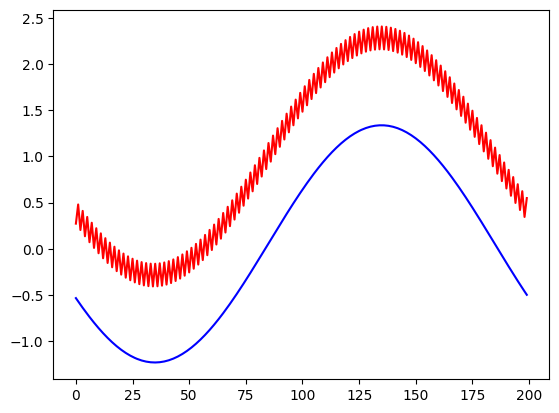

In [ ]:
from helper_functions import *
import numpy as np
import matplotlib.pyplot as plt

N_points = 101
R = 1
thetaspan = 2 * np.pi
L = 2 * np.pi * R

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / (N_points-1)
dl = 2 * R * np.pi / (N_points-1)

epsilon = step * 1e-7

vdisps = np.random.rand(2 * len(curve), 2) - 0.5
#CHANGE 1: NORMALIZING THE DISPLACEMENTS: no problem (even more regular it seems)
vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, None]
vdisps = vdisps * epsilon

vdispsn = np.zeros(vdisps.shape)
vdispsn[0::2] = unit_normals(curve) * epsilon
vdispsn[1::2] = unit_normals(curve) * epsilon

alpha = 0.1

vdisps = vdispsn * alpha + vdisps * (1 - alpha)

p = 1
forces_perp = unit_normals(curve) * p

sigmas, ms = backward_solver_set(curve, L, 201)

# A = populate_matrix(curve, ds, vdisps)
# b = populate_rhs(curve, forces_perp, vdisps)

# soln = np.linalg.solve(A, b)

# sigmas = soln[0::2]
# ms = soln[1::2]

plt.plot(sigmas, label='sigma', color='red')
plt.plot(ms, label='m', color='blue')

(np.float64(-14.9),
 np.float64(312.9),
 np.float64(99.99999999992367),
 np.float64(100.00000000007957))

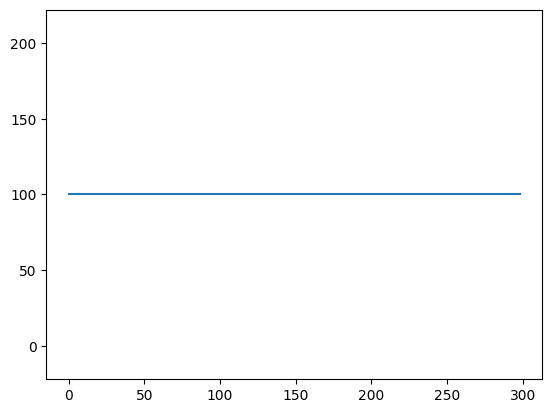

In [13]:
from helper_functions import *

N_points = 300
R = 0.01
thetaspan = 2 * np.pi
L = 2 * np.pi * R

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

kappas = [curvature(curve,  i) for i in range(N_points)]

plt.plot(kappas[:-1])
plt.axis('equal')

## debug by fwd santi

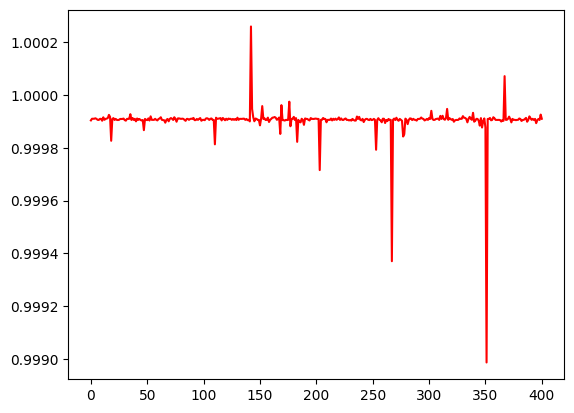

In [144]:
from helper_functions import *
import numpy as np
import matplotlib.pyplot as plt

N_points = 401
R = 1
thetaspan = 2 * np.pi
L = 2 * np.pi * R

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 20 * np.pi * R / N_points
dl = 2 * R * np.pi / (N_points)

epsilon = step * 1e-8

vdisps = np.random.rand(2 * len(curve), 2) - 0.5
vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, None]
vdisps = vdisps * epsilon

vdispsn = np.zeros(vdisps.shape)
vdispsn[0::2] = unit_normals(curve) * epsilon
vdispsn[1::2] = unit_normals(curve) * epsilon

alpha = 0

vdisps = vdispsn * alpha + vdisps * (1 - alpha)

p = 1
forces_perp = unit_normals(curve) * p

A = populate_matrix(curve, dl, vdisps)

x = np.zeros(2 * len(curve))
x[0::2] = p * R

b = np.dot(A, x)

for i, entry in enumerate(b):
    cosine = np.dot(unit_normals(curve)[i // 2], vdisps[i])
    b[i] /= cosine * dl

plt.plot(b[1::2][:], label='sigma', color='red')
# plt.plot(b[1::2], label='m', color='blue')

### That checks out! Now to figure out the following: 

Why is it that if I feed in x constant, I get p constant  to one part in 10^4 or 10^5, but if I feed in p constant with that same value I get back x oscillating with order unity amplitude?



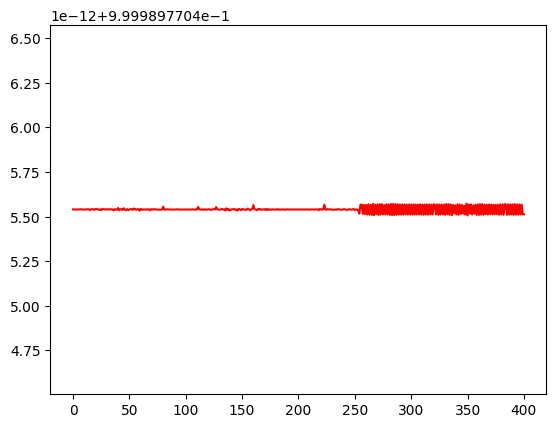

In [137]:
"""
Let's try to apply the same treatment of the previous cell to the rhs of the equation
"""

from helper_functions import *

b = populate_rhs(curve, forces_perp, vdisps)

dl = 2 * R * np.pi / (N_points)

for i, entry in enumerate(b):
    cosine = np.dot(unit_normals(curve)[i // 2], vdisps[i])
    b[i] /= cosine * dl

plt.plot(b[0::2][:], label='p', color='red')

This is an interesting phenomenon. We have to check that this is really happening though!

###  Let's also try doing it with the robust method.

/var/folders/tw/wwds8prs35n99xx6b_5911sh0000gn/T/ipykernel_33923/2318002647.py:36: RuntimeWarning: divide by zero encountered in divide
  b /= vdisps_factors * dl


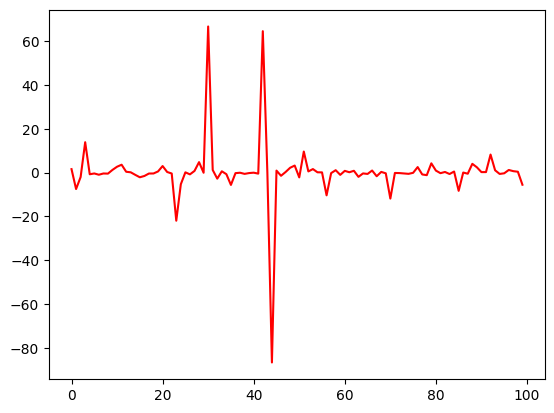

In [11]:
from helper_functions import *
import numpy as np
import matplotlib.pyplot as plt

N_points = 201
R = 1
thetaspan = 2 * np.pi
L = 2 * np.pi * R

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 20 * np.pi * R / N_points
dl = 2 * R * np.pi / (N_points)

disp_curves, vdisp_set = gen_disp_curves(curve, L)
A = populate_matrix_set(curve, L, disp_curves)

x = np.zeros(2 * len(curve))
x[0::2] = p * R

b = np.dot(A, x)

vdisps_factors = np.zeros(2 * len(curve))

for i in range(len(vdisp_set[0])):
    for disp_curve in vdisp_set:
        vdisps_factors[i] += np.dot(unit_normals(curve)[i], disp_curve[i])

b /= vdisps_factors * dl

plt.plot(b[1::2][:], label='sigma', color='red')
# plt.plot(b[1::2], label='m', color='blue')

In [4]:
disp_curves, vdisp_set = gen_disp_curves(curve, L)
vdisp_tots = np.sum(vdisp_set, axis=0)

In [6]:
vdisp_tots.shape

(401, 2)